# **<span style="color:pink">IFN509 - ASSIGNMENT 1 - COVID-19 REPORT</span>**

In [1]:
#Import libraries for data manipulation
import pandas as pd
import numpy as np
#from itertools import compress

#Import libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Adjust datafram dislplay options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# **1. Data manipulation and cleansing**
---

For this report CSV data has been provided.
All data as been imported to Jupyter and is stored in the folder "Data" which contains the following files:

(by state/province,country/region, long/lat dat, cumulative by day starting 22/01/2020)
* *time_series_19-covid-Confirmed.csv* 
* *time_series_19-covid-Deaths.csv* 
* *time_series_19-covid-Recovered.csv*

(population figures by country, for 2016)
* *population-figures-by-country.csv* 

(three letter country code with corresponding name)
* *country_codes.csv* 

**Jason Note**   
* below all files are 3.csv becasue these are the updated ones
* take off the 3 to see original assignment data.
* but the new data helps answer the question if we are still waiting for the official update.

In [2]:
#READ IN DATA
confirmed=pd.read_csv(r"time_series_covid19_confirmed_global.csv").drop(columns=['Lat', 'Long']) #remove Lat/Long so as not to carry around additional columns
recovered=pd.read_csv("time_series_covid19_Recovered_global.csv").drop(columns=['Lat', 'Long']) #remove Lat/Long so as not to carry around additional columns
deaths=pd.read_csv("time_series_covid19_Deaths_global.csv").drop(columns=['Lat', 'Long']) #remove Lat/Long so as not to carry around additional columns
country_codes=pd.read_csv("country_codes.csv",index_col='Country')
country_population=pd.read_csv("population_figures_by_country.csv",index_col='Country_Code',usecols=['Country_Code','Year_2016']) # only read in country code and most recent population

In [3]:
confirmed.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25


In [4]:
recovered.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6


In [5]:
deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [6]:
country_codes.head()

,Country_Code
Country,
occupied Palestinian territory,PSE
Saint Martin,ANT
Holy See,VAT
Saint Barthelemy,BLM
Vatican City,VAT


In [7]:
country_population.head()

,Year_2016
Country_Code,
ABW,104822
AFG,34656032
AGO,28813463
ALB,2876101
AND,77281


**Jason Note**   
* Now data is only by country (no regions/states)

In [8]:
#GROUP DATA BY COUNTRY
#This enables us to compare countries with countries, at the moment the data is split into provinces/states for some countries but not others.
confirmed_grouped=confirmed.groupby('Country/Region').sum()
deaths_grouped=deaths.groupby('Country/Region').sum()
recovered_grouped=recovered.groupby('Country/Region').sum()

In [9]:
print(confirmed_grouped.shape)
confirmed_grouped.head()


(185, 93)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25


In [10]:
deaths_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
recovered_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6


In [12]:
#REINDEX (Confirmed/recovered/deaths)
#this makes sures all countries have the same row index in all three dataframes
new_index=confirmed_grouped.index.values.tolist()
recovered_grouped=recovered_grouped.reindex(new_index,fill_value=0)
deaths_grouped=deaths_grouped.reindex(new_index,fill_value=0)

In [13]:
#new_index

In [14]:
recovered_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6


In [15]:
deaths_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [16]:
#CREATE DATAFRAME FOR ACTIVE CASES
#active cases can be found interms of 3 data files we have read in the previous step
#active=confirmed-(deaths+recovered)
active_grouped=confirmed_grouped-recovered_grouped-deaths_grouped

In [17]:
active_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,20,21,21,21,23,23,38,38,72,80,88,104,104,114,164,165,228,257,265,282,327,338,391,401,437,474,505,557,612,651,716,756,777,791,832,855,906,970,1058
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,11,22,32,37,41,50,54,57,62,68,72,85,98,108,124,151,147,156,169,168,176,177,185,198,214,237,240,230,224,221,211,213,206,212,203,218,215,230,220,222,231,238,251,251
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,15,16,22,32,38,44,55,46,47,92,119,148,221,216,313,354,394,449,512,626,728,839,1004,1031,1078,1160,1162,1130,1084,1100,1090,1030,1069,1053,1116,1137,1208,1273,1207,1235,1267,1304,1245
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,38,38,52,74,87,111,131,162,186,220,263,304,327,352,354,366,403,407,428,457,473,484,489,500,504,504,481,489,500,471,471,470,464,442,432,398,377,353
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,5,5,4,5,5,5,6,10,12,13,15,15,15,13,13,13,12,12,12,12,16,16,16,16,17,17


In [18]:
#CHECK DATAFRAMES
#Print rows/columns and compare.
print(confirmed_grouped.shape)
print(deaths_grouped.shape)
print(recovered_grouped.shape)
print(active_grouped.shape)

#check indexs are equal(sums "True", so value should equal total number of rows)
print((confirmed_grouped.index==recovered_grouped.index).sum())
print((recovered_grouped.index==deaths_grouped.index).sum())
print((deaths_grouped.index==active_grouped.index).sum())

(185, 93)
(185, 93)
(185, 93)
(185, 93)
185
185
185


**Jason Note**   
* names are changed because they are not the same between the population and codes csvs

In [19]:
#MANUALLY CHANGE COUNRTRIES WITH INCONSISTENT NAMES
Name_in_JHpk=['Bahamas','Gambia','Burma','Laos','Syria','Saint Kitts and Nevis']
Name_in_CountryC=['Bahamas, The','Gambia, The','Myanmar','Lao PDR','Syrian Arab Republic','St. Kitts and Nevis']

for new in Name_in_JHpk:
    country_codes.rename(index={Name_in_CountryC[Name_in_JHpk.index(new)]:new},inplace=True)


In [20]:
confirmed_grouped.rename(columns={'Country/Region': 'Country_Region',
                                   }, inplace=True)
active_grouped.rename(columns={'Country/Region': 'Country_Region',
                                   }, inplace=True)

**Jason Notes**    
There may be inconsistencies in the formats used, or errors in the data. How are you handling that?
* reindex ensures all data frames have consistent index
* manually changing inconsistent country names between country_codes,country_population and all grouped dataframes (confirmed_grouped, ect.)

# **2. Descriptive analysis and initial data exploration**
---
Please address the following questions:
* Q1) How many countries have reported at least 10 cases?
* Q2) Which are the five countries with the highest number of active cases?
* Q3) What is the current rate of increase in the total number of cases, based on the last week of data?

In [21]:
# Q1
Atleast10=(confirmed_grouped.iloc[:,-1]>=10).sum() #T/F if last column >=10, then sum(true)
print('Q1 Answer: There are ', Atleast10, ' countries with at least 10 confirmed cases.')

Q1 Answer: There are  176  countries with at least 10 confirmed cases.


In [22]:
#Q2
Top5=active_grouped[0:5].index.values.tolist()
print('Q2 Answer: The top 5 countries in terms of active cases are: ',Top5)
# these are top countries with alphabet not with highest numbers

Q2 Answer: The top 5 countries in terms of active cases are:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']


In [23]:
#Q3
Average_Daily_Percent_Change=round(confirmed_grouped.sum().pct_change()[-7:].mean()*100,2) #daily pct increase averaged over last 7 days of data

print('Q3 Answer: The current rate of increase in global confirmed cases is ', Average_Daily_Percent_Change,'% -this was calculated by averaging the daily percent increases over the most recent 7 days of data.')

Q3 Answer: The current rate of increase in global confirmed cases is  3.34 % -this was calculated by averaging the daily percent increases over the most recent 7 days of data.


# **3. Data normalisation**
---
The data in it's current format is useful but has two limitations, which can be accounted for as follows:
* The outbreak started at differnt times in each country. (normalise data to days since 10 confirmed case)
* Counrties have different populations. (normalise data to per million people)

In [24]:
#NORMALISE GROUPED_CONFIRMED BY OUTBREAK START AS DAY0
#Where day0 is defined as the day the terroitory reaches or exceeds 'n' confirmed cases.
#function for normalising a df to day0

def normalise_day0(df,n):#input n which is the min number of confirmed cases in order to start day0
    df_day0=pd.DataFrame()
    for index in confirmed_grouped.index:
            day0row=df.loc[index][confirmed_grouped.loc[index]>=n].T.reset_index(drop=True).T #loop along row to find >=n
            df_day0=pd.concat([df_day0,day0row], ignore_index=True, axis=1, sort=True) #append to ne df
    df_day0=df_day0.T
    df_day0.index=df.index #reset index based on input df
    return df_day0

In [25]:
#normalise for both confirmed and active

n=40 #assignment says to use n=10 but I think maybe we should use n=20 or 50 makes a lot more sense and is what is reported in the media
confirmed_grouped_day0=normalise_day0(confirmed_grouped,n)
active_grouped_day0=normalise_day0(active_grouped,n)

In [26]:
#NORMALISE GROUPED_CONFIRMED_DAY0 BY POPULATION (PER MILLION)
#Initialise two new lists. one to hold country codes and another to hold country population. **ordering is kept consistent with confirmed_group df**
code_match=[]
pop_match=[]
    
#match codes with confirmed_grouped df    
for index in confirmed_grouped.index:
    if index in country_codes.index:
        code_match.append(country_codes.loc[[index]].iloc[0,0])
    else:
        code_match.append('No Match')

#match population with code_match list
for code in code_match:
    if code in country_population.index:
        pop_match.append(country_population.loc[[code]].iloc[0,0])
    else:
        pop_match.append('NaN')

#convert pop_match list to millions        
pop_match=[round(float(i)/1000000,2) for i in pop_match]  

#create normalised df as cases per million people
confirmed_grouped_day0_permillion=confirmed_grouped_day0.copy()
for index in range(len(confirmed_grouped_day0_permillion.index)):
    confirmed_grouped_day0_permillion.iloc[index,:]=[i/pop_match[index] for i in confirmed_grouped_day0_permillion.iloc[index,:]]

**Jason Note**   
* below just filters so you only see countries with at least a certain number of days since day0

In [27]:
#function to filter the df based on minimum number of days since day0, ie Min=5 filters for any country which has reached day5
def filter_min_since_day0(df,Min):
    return df[df.iloc[:,Min+2].notna()]

In [28]:
#display filtered dataframe
Min=50
filter_min_since_day0(confirmed_grouped_day0_permillion,Min)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bahrain,28.671329,32.867133,34.265734,34.265734,36.363636,38.461538,41.958042,59.440559,59.440559,66.433566,76.923077,136.363636,136.363636,136.363636,146.853147,149.650350,149.650350,159.440559,179.020979,194.405594,199.300699,213.286713,233.566434,263.636364,274.125874,293.006993,320.279720,325.874126,332.867133,348.951049,360.139860,396.503497,397.902098,449.650350,469.930070,481.118881,489.510490,528.671329,567.132867,575.524476,620.279720,646.853147,727.272727,794.405594,951.748252,1068.531469,1168.531469,1188.811189,1216.783217,1239.860140,1315.384615,1333.566434,1379.720280,1417.482517,1550.349650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,0.397487,0.466395,0.667315,1.019831,1.505085,2.086809,3.995909,4.415157,5.905009,7.109802,8.625042,12.062437,14.300843,17.195683,19.903384,22.186036,24.741416,26.702740,28.889646,30.721135,32.195030,32.465583,43.444359,48.132244,49.622822,51.146040,52.539422,53.828355,54.124295,54.456501,54.799588,55.852059,55.867291,56.026141,56.398242,56.697083,57.011881,57.249793,57.560240,57.978037,58.126006,58.216674,58.307342,58.416869,58.527846,58.585873,58.624316,58.651154,58.670738,58.695400,58.703379,58.712808,58.736019,58.754878,58.776638,58.794772,58.826687,58.865855,58.934037,58.973931,59.068226,59.113922,59.181379,59.232153,59.319919,59.403334,59.477319,59.566536,59.621662,59.680414,59.739892,59.791392,59.848694,59.871905,59.914700,59.960396,59.998839,60.064846,60.118521,60.160591,60.213541,60.300582,60.357884,60.425341,60.461608,60.495699,60.754646,60.77423,60.787286,60.79599,60.822103,60.832983,60.844588
France,0.852018,1.494768,1.943199,2.855007,3.049327,4.304933,5.680120,9.805680,14.334828,16.980568,18.221226,26.816143,34.275037,34.275037,55.022422,67.204783,67.742900,99.895366,115.321375,136.382661,163.976084,190.702541,216.188341,242.795217,300.792227,338.146487,382.660688,441.718984,499.282511,569.581465,608.490284,675.186846,789.641256,863.213752,895.799701,974.618834,1038.863976,1067.443946,1126.203288,1183.303438,1241.509716,1305.919283,1371.270553,1417.982063,1819.312407,1874.349776,1963.542601,2011.689088,2198.669656,2229.147982,2229.431988,2303.393124,2339.013453,2381.121076,2348.654709,2383.557549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.556429,0.580622,0.955607,1.572517,1.923310,2.370872,3.169227,5.830410,8.104512,9.664933,12.580138,14.225233,17.624289,23.079715,25.136083,44.453853,55.461473,70.097980,87.964195,111.975324,149.110923,185.315108,240.087093,268.694811,300.870933,351.469699,399.008105,451.469699,531.486634,615.350187,697.895246,751.118906,809.060119,868.610137,941.962018,1025.692512,1102.685376,1162.356357,1211.116487,1250.441514,1302.322487,1370.460869,1429.551228,1477.815411,1510.922947,1546.558607,1573.388170,1588.956090,1630.010887,1665.634450,1710.378614,1733.905891,1756.187251,1778.940365,1793.770412,1822.281360,1852.292246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iran,0.535625,0.759841,1.183358,1.731440,3.051819,4.833084,7.386647,12.182362,18.697060,29.098156,36.397608,43.759342,59.130543,72.533632,81.788739,89.200299,100.174390,112.107623,125.498256,141.554559,158.557549,173.617339,186.733931,201.407573,216.255605,229.285002,244.693572,256.726457,269.531639,287.107623,309.055805,336.534629,366.292975,402.740409,441.056303,477.192327,516.878426,555.61783

**Part 3 Discussion**
* countries most days since day0
* could also normal confirmed_group directly by population to more easily see which country has the greatest number of confirmed cases per capita
* 

# **4. Further data exploration**
---

## 4.1 Peak of active cases for local outbreaks
* Which countries seem to have passed the peak of their local outbreak?
* How long does it take countries to reach the people of their local outbreak?

In [29]:
#active_grouped_day0

## 4.2 Patient recover time
* Based on available data, can you estimate how long it takes a patient to recover?
* How confident can you be about this estimate?




In [30]:
#create a recover estimator
country='Italy'

def Patient_Recovery_Time_Upper(country): #input= Country
    Estimate=[]
    ListR=recovered_grouped.loc[country]
    ListC=confirmed_grouped.loc[country]
    for i in range(len(ListR)):
        if ListR[i] >=100:
            for ii in range (len(ListC)):
                diff=float('NaN')
                if ListC[ii]>=ListR[i]:
                    diff=i-ii+0.5
                    Estimate.append(float(diff))
                    break
    return sum(Estimate[:10])/10 #sum(Estimate)/len(Estimate)

def Patient_Recovery_Time_Lower(country): #input= Country
    Estimate=[]
    ListR=[recovered_grouped.loc[country][i]+deaths_grouped.loc[country][i] for i in range(len(recovered_grouped.loc[country]))]
    ListC=confirmed_grouped.loc[country]
    for i in range(len(ListR)):
        if ListR[i] >=100:
            for ii in range (len(ListC)):
                diff=float('NaN')
                if ListC[ii]>=ListR[i]:
                    diff=i-ii+0.5
                    Estimate.append(float(diff))
                    break
    return sum(Estimate[:10])/10 #sum(Estimate)/len(Estimate)

average=[]
for country in recovered_grouped.head(5).index:  
    print(country)
    print('Upper: ',Patient_Recovery_Time_Upper(country))
    print('Lower: ',Patient_Recovery_Time_Lower(country))
    print('Average: ',(Patient_Recovery_Time_Lower(country)+Patient_Recovery_Time_Upper(country))/2)
    average.append((Patient_Recovery_Time_Lower(country)+Patient_Recovery_Time_Upper(country))/2)

sum(average)/len(average)

Afghanistan
Upper:  13.1
Lower:  14.35
Average:  13.725
Albania
Upper:  13.8
Lower:  12.1
Average:  12.95
Algeria
Upper:  14.7
Lower:  11.9
Average:  13.3
Andorra
Upper:  22.7
Lower:  21.7
Average:  22.2
Angola
Upper:  0.0
Lower:  0.0
Average:  0.0


12.434999999999999

## 4.3 Effectiveness of mitigation startegies
* Consider the number of active cases relative to the number of confirmed cases. What can be said about the effectiveness of their mitigation strategies?

first let we make two graphs of active and confirmed cases to show thie differene and later on we will discus each country
with comparison using visualization

In [31]:
def plot_by_day0(df,countries,log,title,xtitle,ytitle):
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    plt.grid(True, linewidth=1, color='dimgrey',linestyle=':')
    
    df=df.loc[countries].T
    plt.plot(df) #linestyle="--"
    plt.legend(df.columns,bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.,frameon=False)
    
    xmin=0;xmax=90;ymin=10;ymax=1000000
    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)
    ax.set_title(title) 
    
    if log==1:
        ax.set_yscale('log')
    return plt.show()

In [32]:
def plot_by_date(df,countries,log,title,xtitle,ytitle):
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    plt.grid(True, linewidth=1, color='dimgrey',linestyle=':')
    
    df=df.loc[countries].T
    plt.plot(df) #linestyle="--"
    plt.legend(df.columns,bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.,frameon=False)
    
    xmin=0;xmax=90;ymin=10;ymax=1000000
    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)
    ax.set_title(title)
    ax.set_xticklabels(df.T.columns, rotation = 70)
    
    n = 3  # Keeps every 7th xlabel
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    
    if log==1:
        ax.set_yscale('log')
    return plt.show()

#horizontalalignment='right')

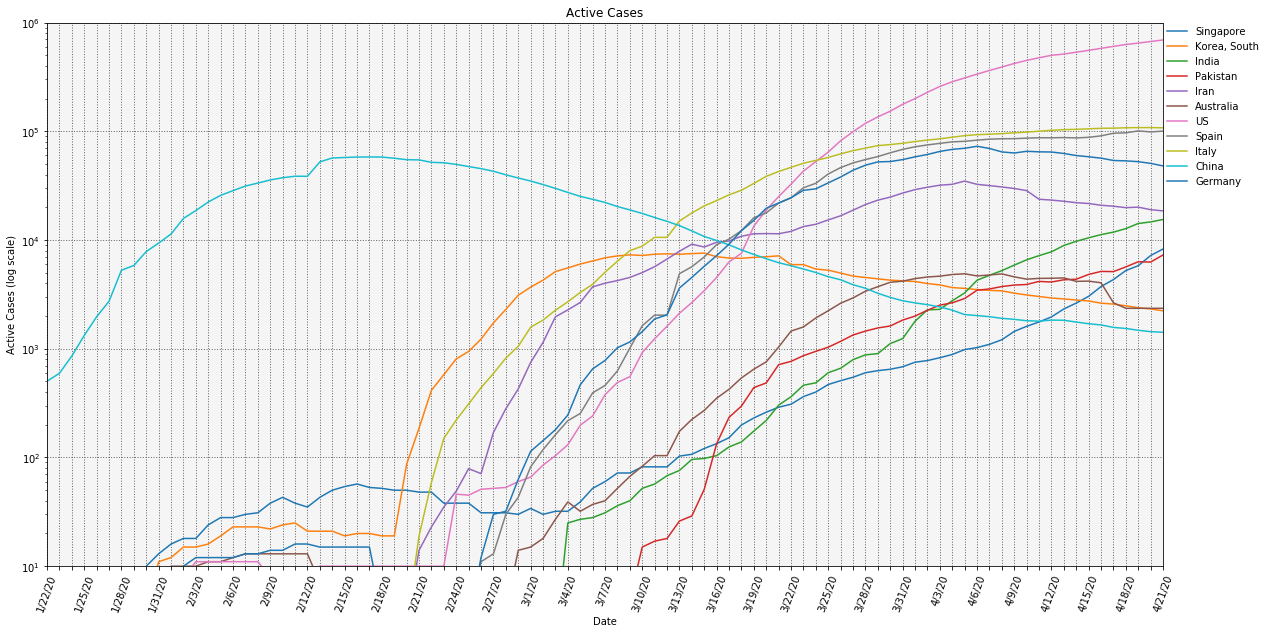

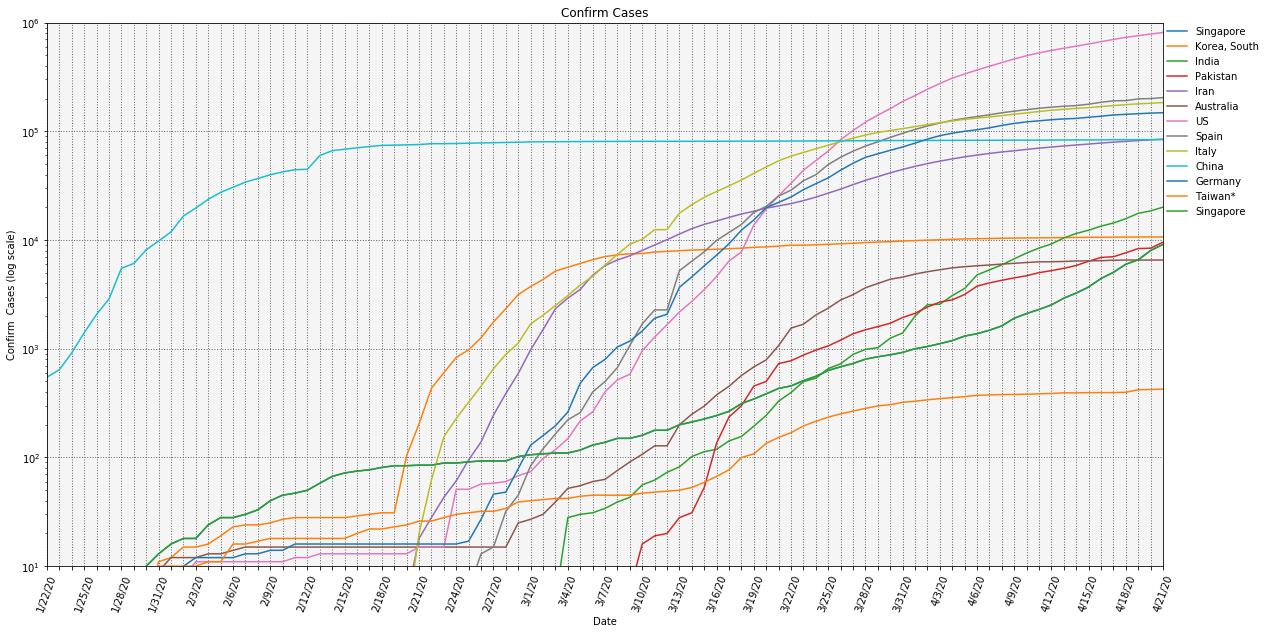

In [33]:
df=active_grouped
countries=['Singapore','Korea, South','India','Pakistan','Iran','Australia','US','Spain','Italy','China','Germany']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Singapore','Korea, South','India','Pakistan','Iran','Australia','US','Spain','Italy','China','Germany','Taiwan*','Singapore']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

# Now would like to compare one by one country

# USA

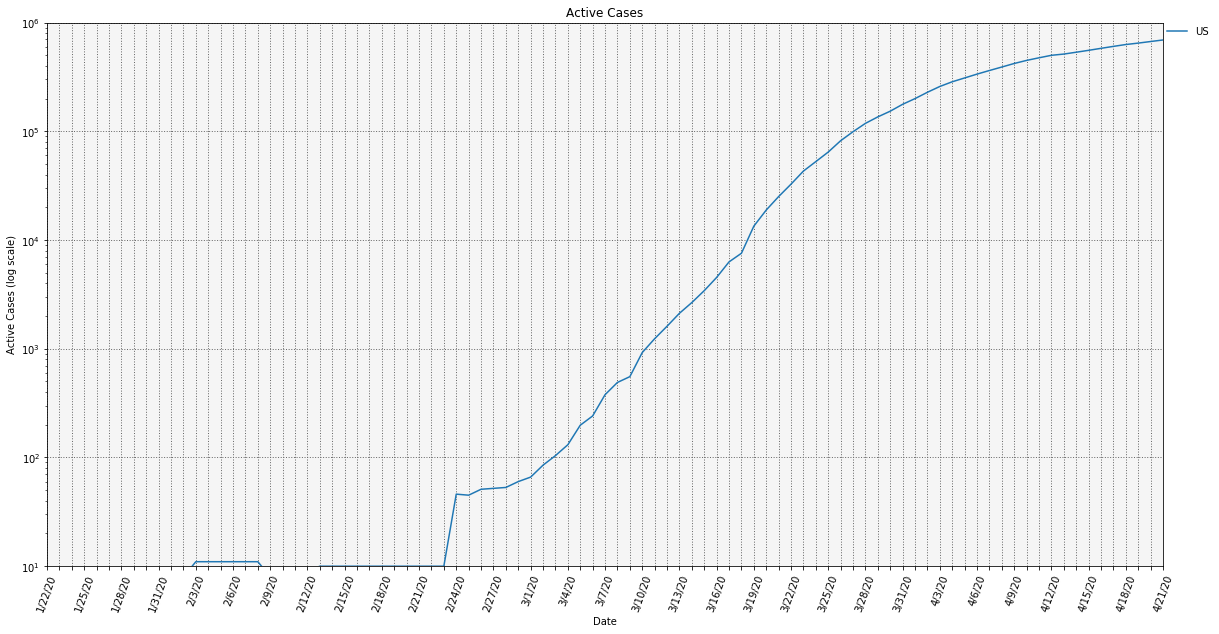

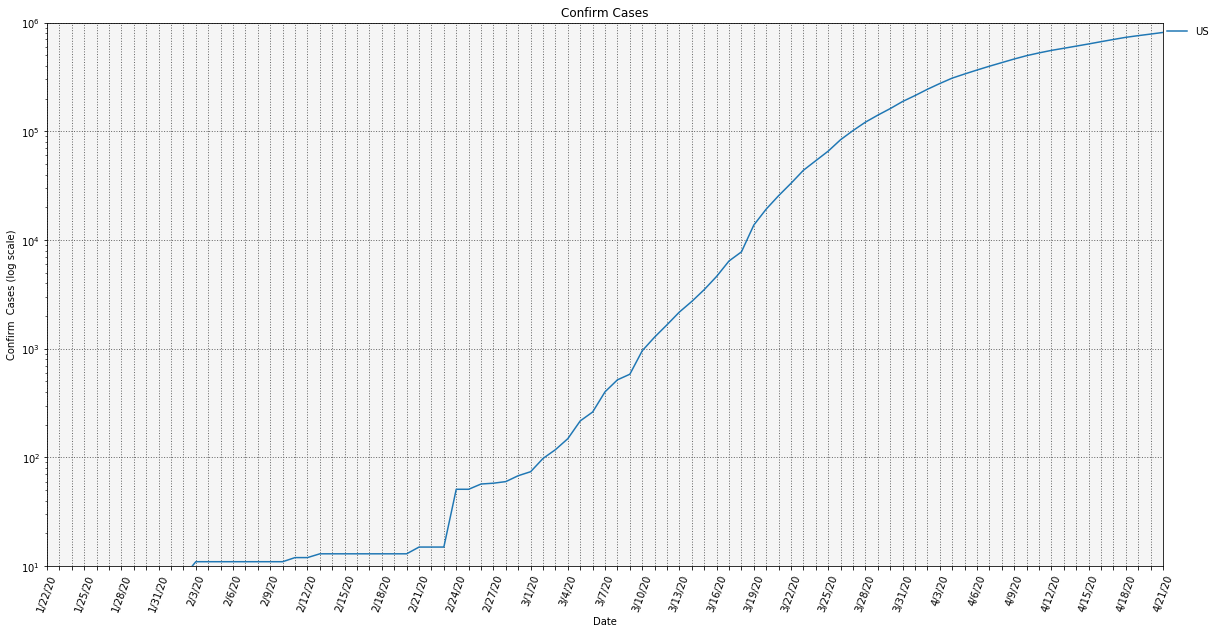

In [34]:
df=active_grouped
countries=['US']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['US']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

By seeing above both charts of active and confirm cases in united state america, One can say that the 
total number of active and confirm cases are increasing day by day. However there is slightly difference between
active cases and confirm cases because about more than 90k people get recovered and almost 50k amount of people died as well.
In this time USA is the country with most active, death and confirm cases . one can say that
in start if social distancing was kept than this virus will never spread too much in USA. secondly 
Now many states of USA has full lockdown. hope in few months number of active cases will be less.

#  Austrailia

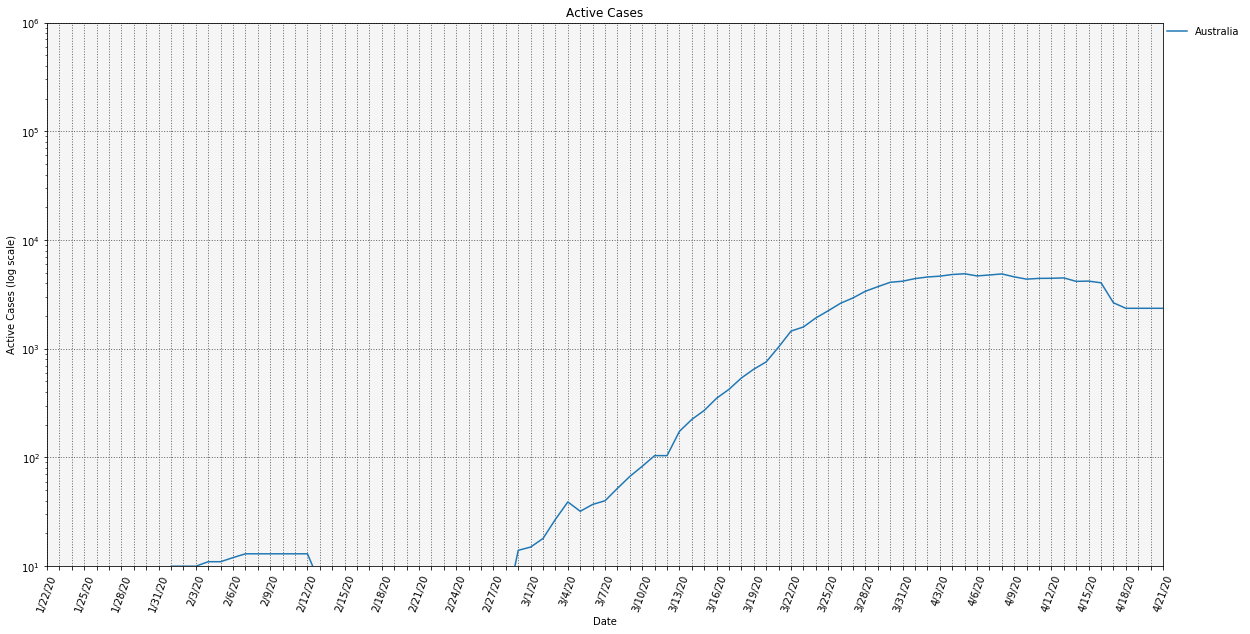

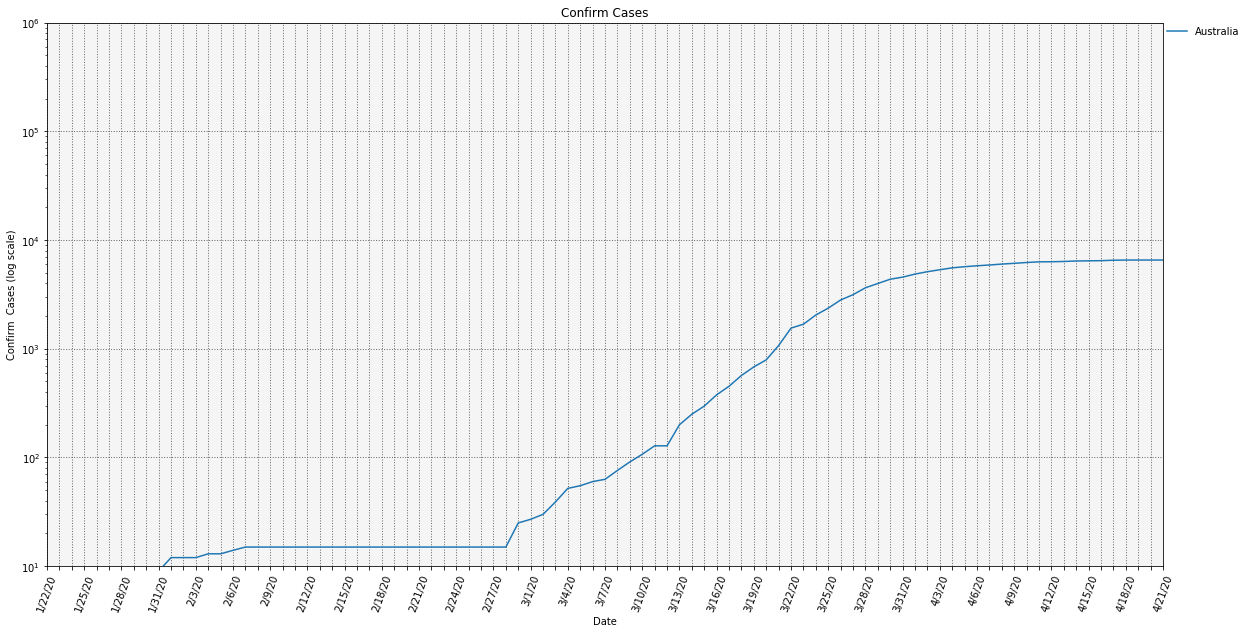

In [35]:
df=active_grouped
countries=['Australia']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Australia']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

Its good to see Austrailia is a country where in start a number of confirm cases were increasing rapidly but from march 25
they control on corona virus and now every day active cases also going less because the patients are recovering 
and virus is not spreading more this is because Australia’s response to the pandemic has largely centred on shutting its borders
,limiting public gatherings and conducting large-scale testing and contact tracing.
Travelling overseas is banned, foreigners aren’t allowed to enter the country,
and Australians who return from other countries are kept in mandatory quarantine at specially designated hotels for two weeks.
The main reason for Australia’s success is probably its strict travel restrictions.





# Spain

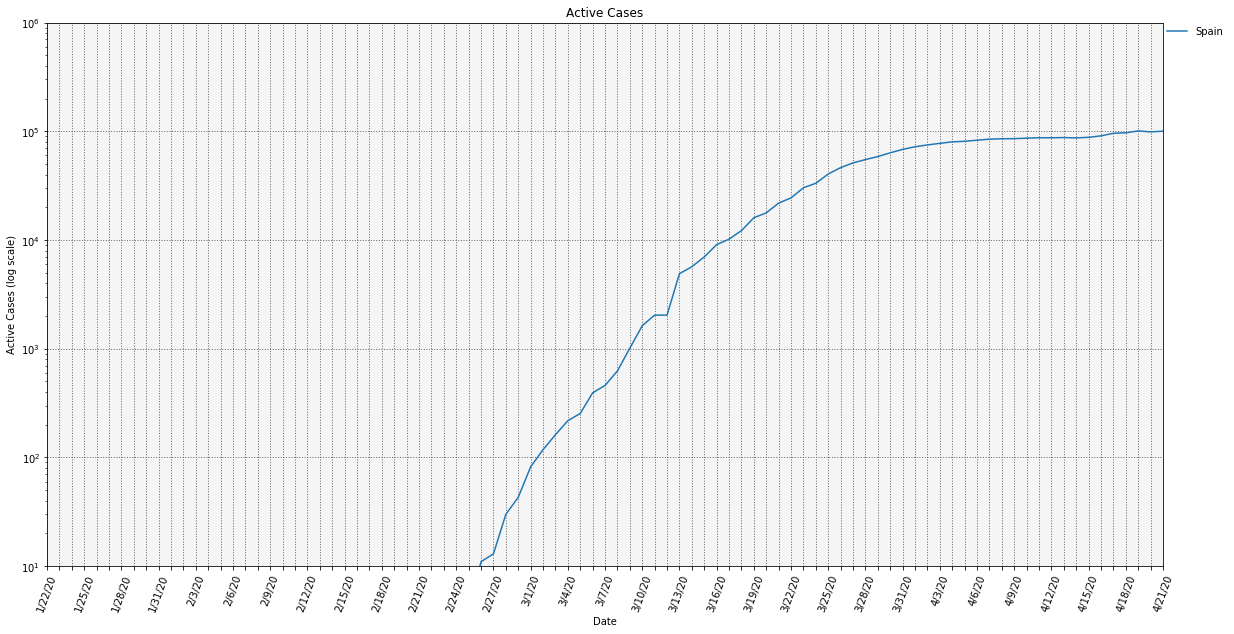

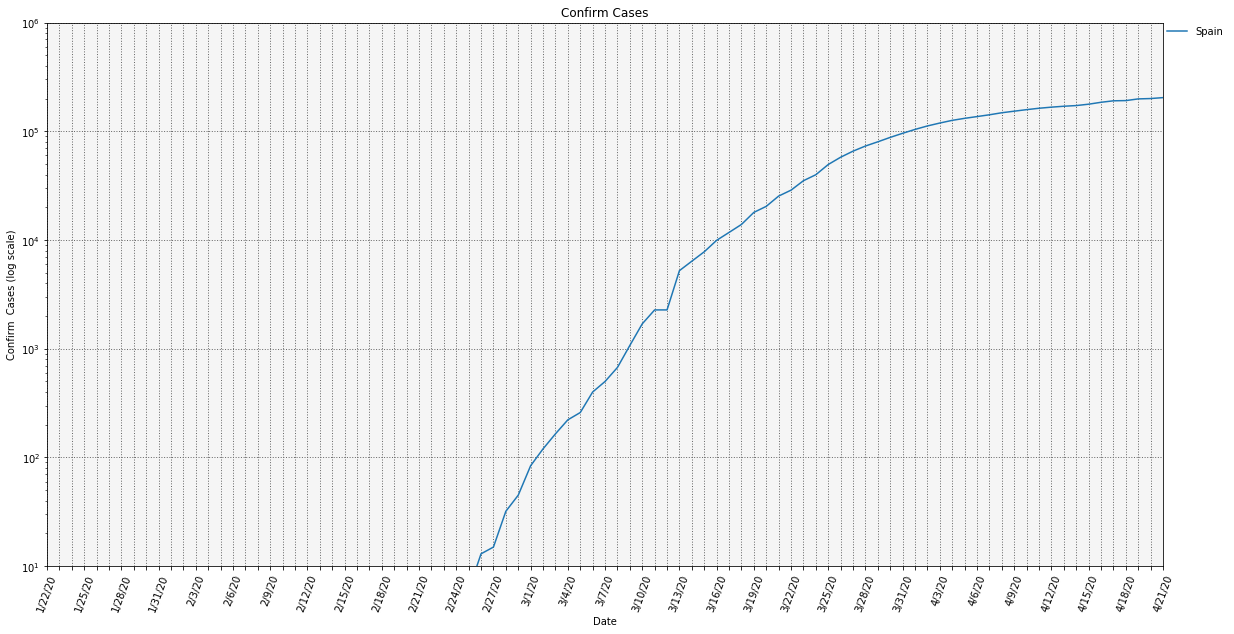

In [36]:
df=active_grouped
countries=['Spain']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Spain']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

The main reason for the quick spread through Spain may be completely mundane. It has been an unusually mild, sunny spring. 
In late February and early March, with temperatures above 20C (68F), Madrid’s pavement cafes and bars were heaving with happy 
folk, doing what Madrileños like best – being sociable. That means hugging, kissing and animated chatter just a few
inches from someone else’s face.
The Socialist-led government of Pedro Sánchez reacted late and clumsily. 
Moreover The country lacked essential equipment,
Ventilators, protective clothing for doctors and coronavirus tests are still only just being sourced. that is the reaso they still have number of 
active and confirm cases.


# Italy

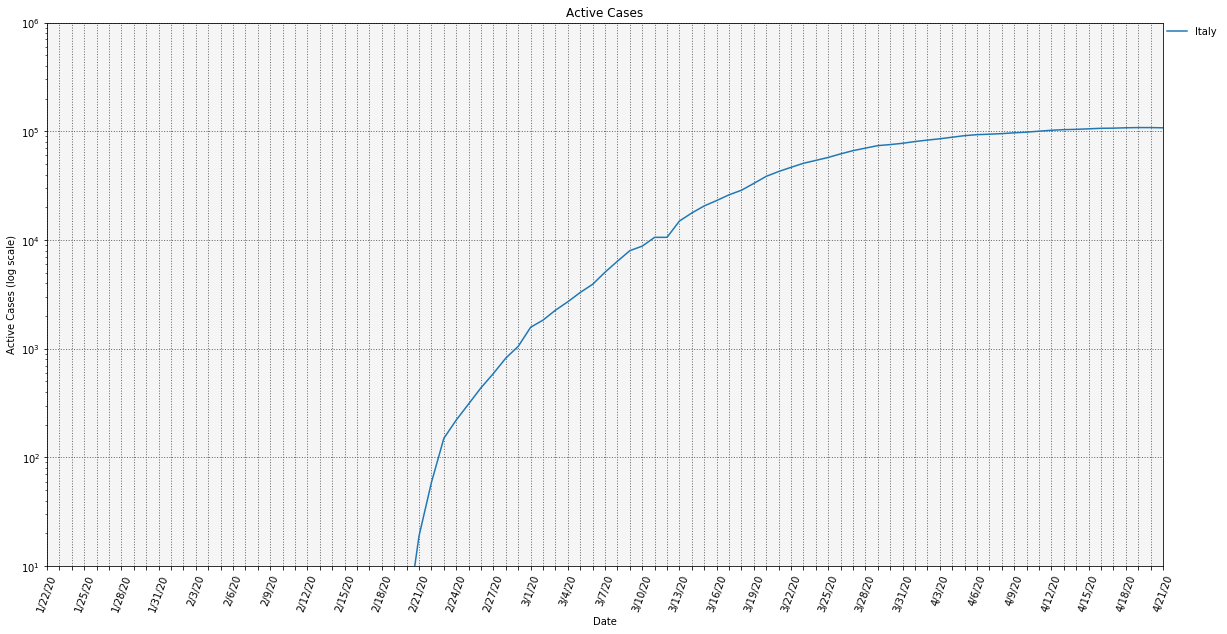

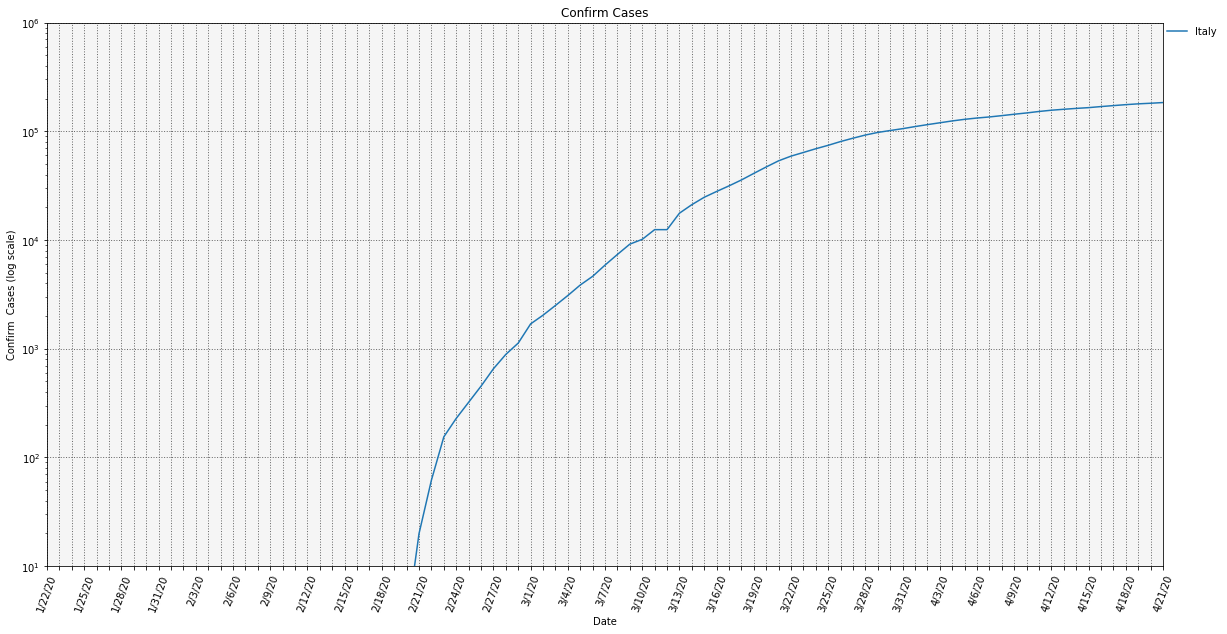

In [37]:
df=active_grouped
countries=['Italy']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Italy']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

Italy is one of the country which is suffering too much with this diesease. one reason is that in start people did not give much attension
to 'WHO' warnings about gathering and festivels. They let as usual flue due to winter and etc and also govermnet did not give much attension
for lockdown and other safety measures but later on goverment impose full lockdown and fine on peoples for irreguler activities from 
outside home and now we are seeing in graph their active cases are going less and less.

# UK

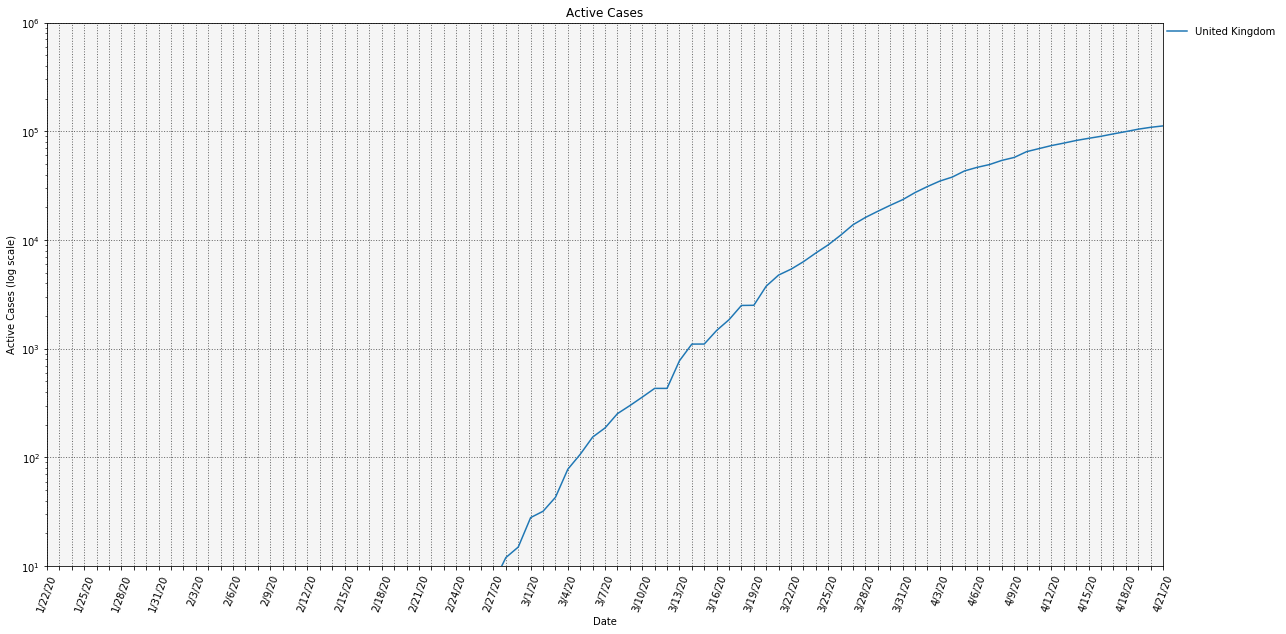

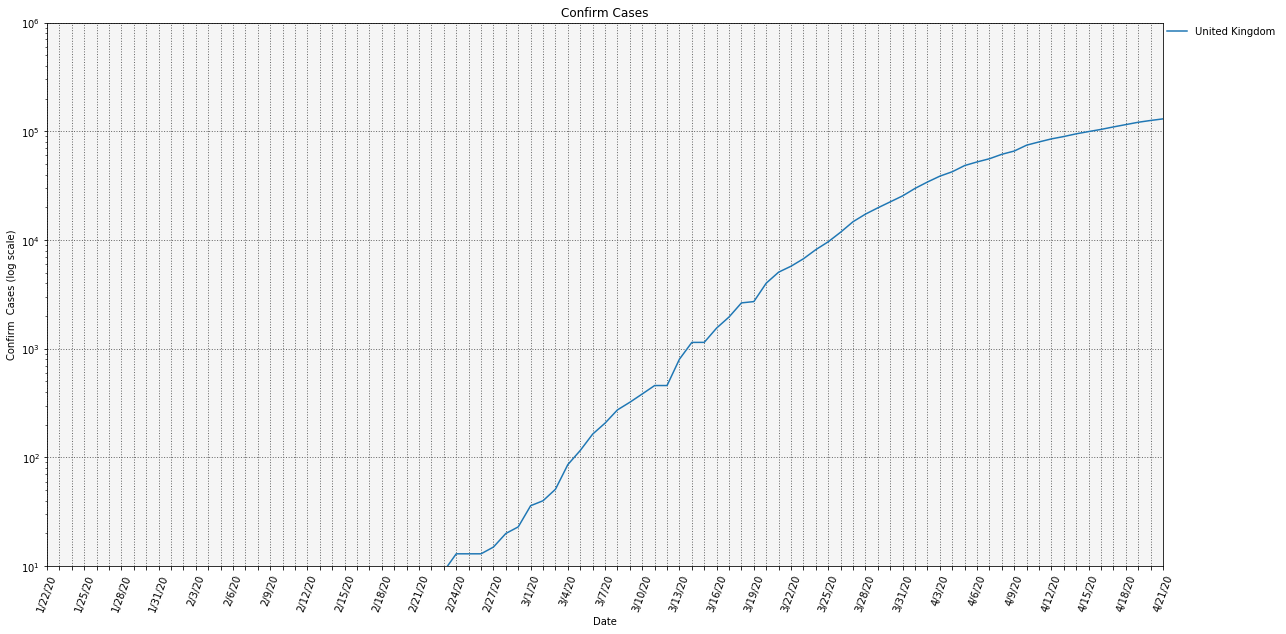

In [38]:
df=active_grouped
countries=['United Kingdom']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['United Kingdom']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

Due to non Serious behaviour of  govt in europe, The situation is worse than rest of countries, 
One of the main reason of the spread of pandemic is that europe is considered to be a best tourist spot.
they had not enforced strict lockdown to ensure public safety. and having too much active and confirm cases

# germany

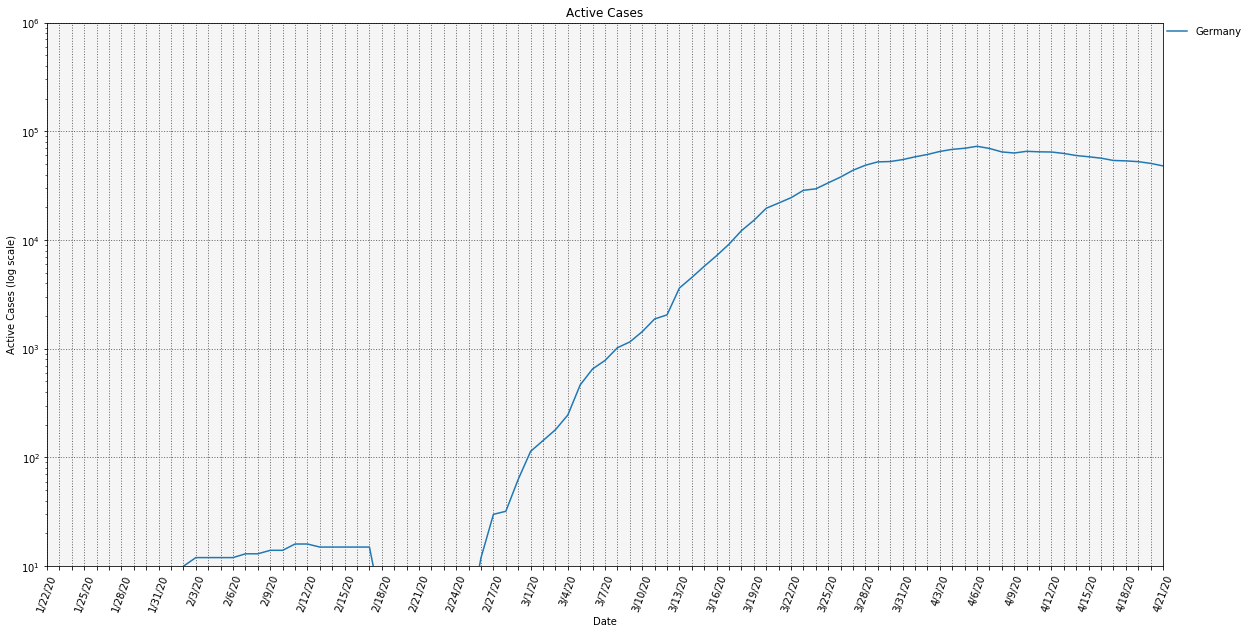

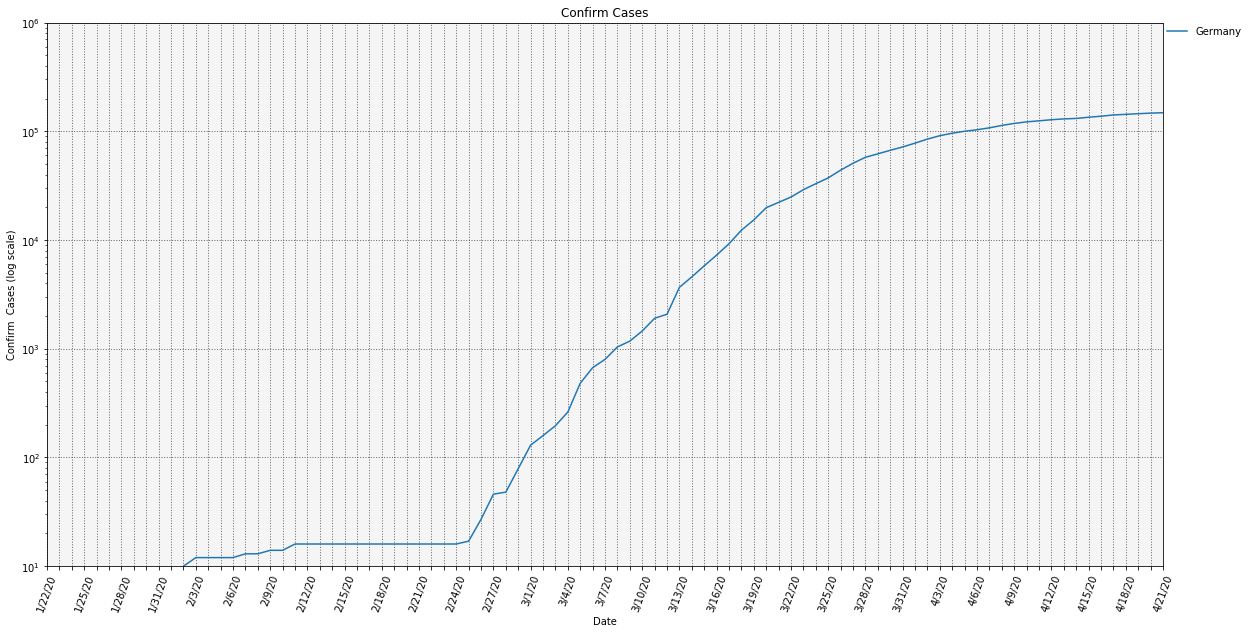

In [40]:
df=active_grouped
countries=['Germany']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Germany']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
At start they did not give much attention so  cases are more .
Secondly Germany is a well developed country and having leading economy in world thus having it means having more medical
facilities which allows them to conduct more tests, they have better medical facilities, more awareness about waht is going on in world
regarding covd_19. hence allowing them to predict exact number of people who have been affected by this virus, hence too much number of patients
than other countries. but as they are more educated and aware they control the diesease and from last 1.5 weeks their active cases are going down.

In [ ]:
# India

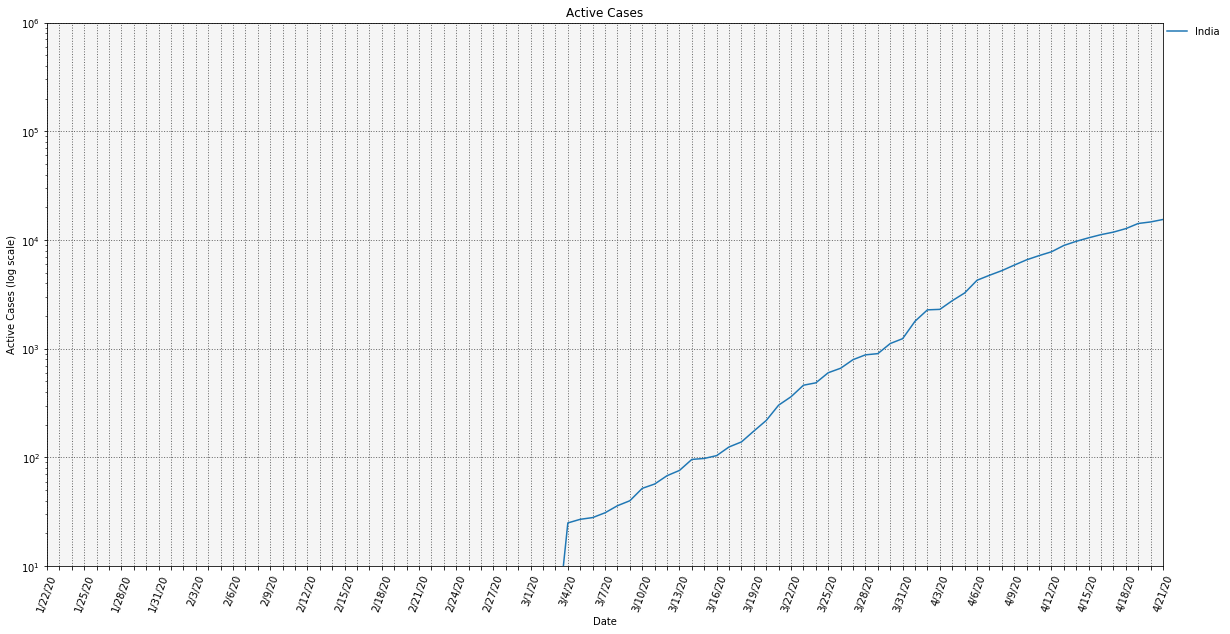

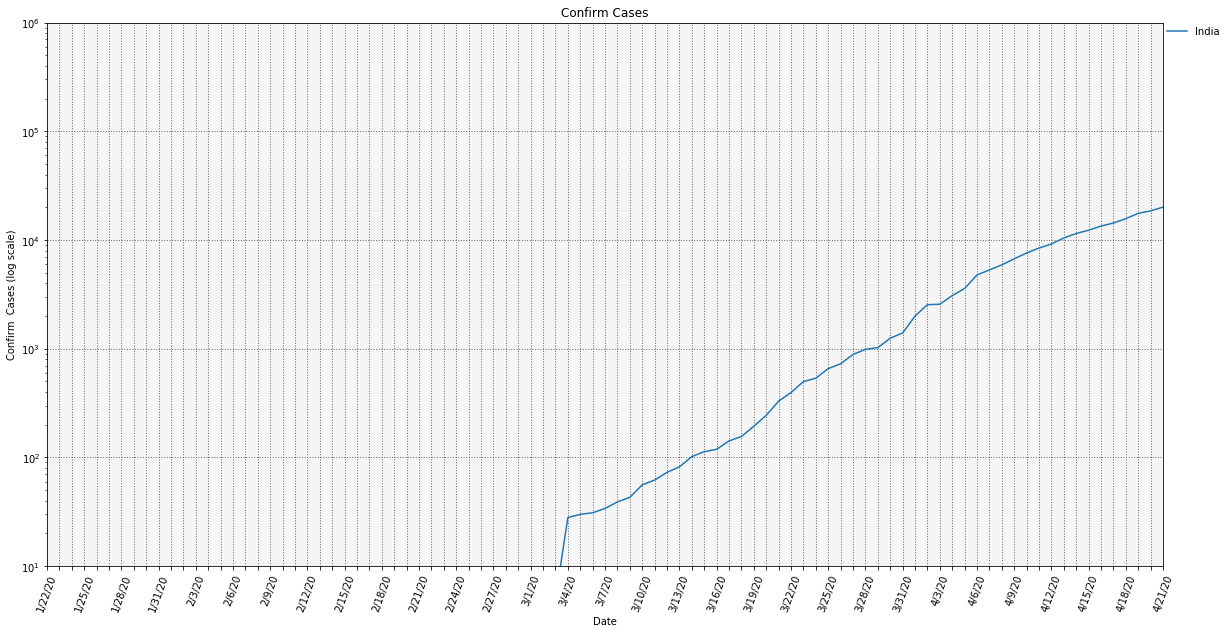

In [41]:
df=active_grouped
countries=['India']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['India']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
India is a counrtry having too much populataion and most of the people are less aware and eduacted, Goverment took good step for lockdown
early on could not work too much for india because the number of active and confirmed cases are incresing. still by govermnt good
and feasible steps they have less number of death rates.

# pakistan

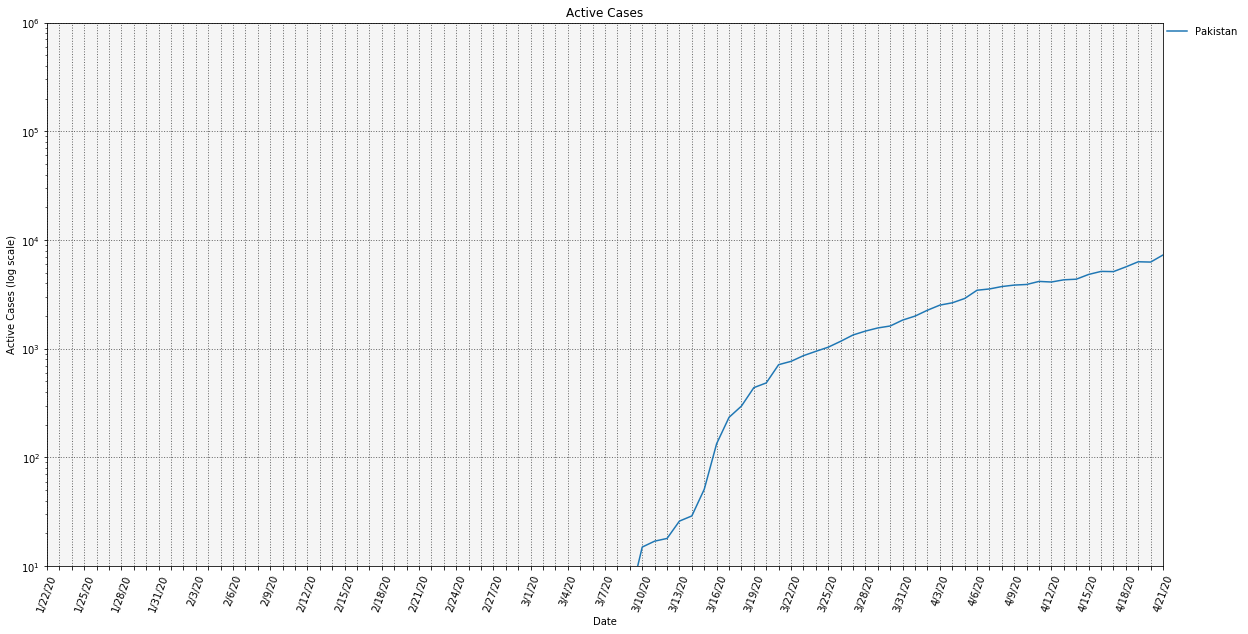

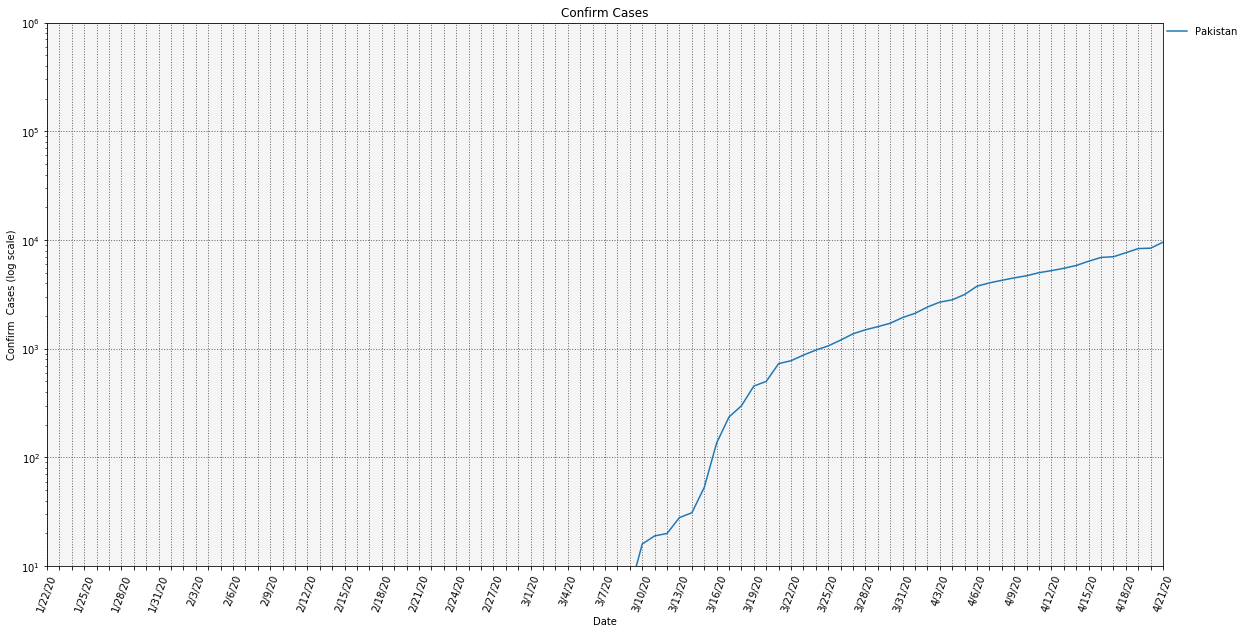

In [42]:
df=active_grouped
countries=['Pakistan']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['Pakistan']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
Due to mismanagement by the govermnet, Virus spread in pakistan through iran and other foreign countries, But still goverment taken 
encouraging steps to slow its pace and they have less number of active and confirmed cases.

# China

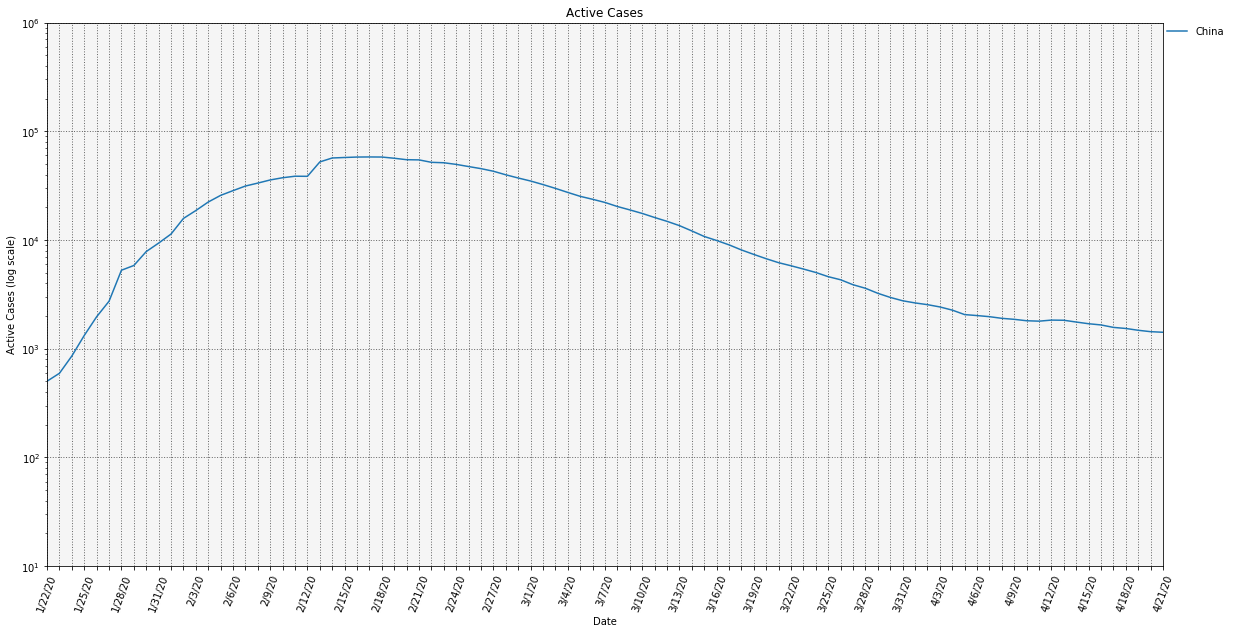

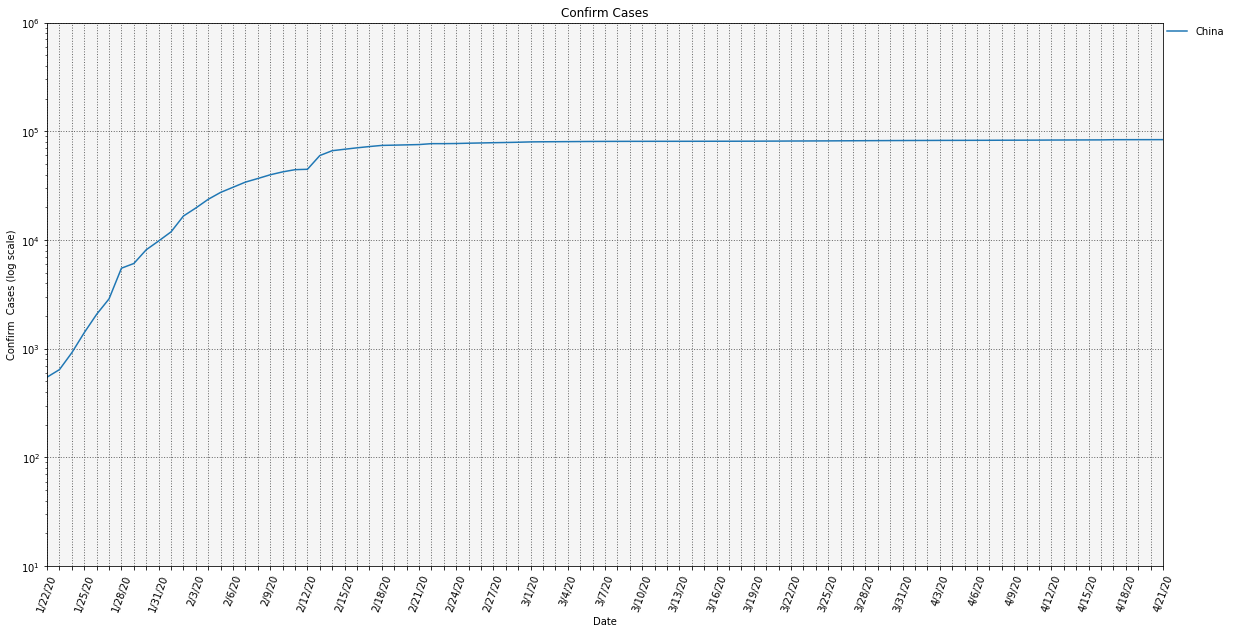

In [43]:
df=active_grouped
countries=['China']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)


df=confirmed_grouped
countries=['China']
log=1
title='Confirm Cases'
xtitle='Date'
ytitle='Confirm  Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
China was country who suffered with this dieseas , and start their active and confirm cases were so high. but with great strategy
use by thier govermnet of complete lockdown in most affected areas, people also coperate with Govermnt, China has gone from villain to saviour, as equipment and tests pour in – much of it brokered 
by the same Chinese immigrant community that has closed shops and shut itself away to avoid a racist backlash.
and now their active cases are just going down and down and having very neglecable new confirm cases. China win against this dieseas.

## 4.4 Case fatality rate (CFR)
* Can you estimate the CFR from the following two options?
* What are the assupmtions?
* What range of values do you get?
* Does this vary over time?
* Is there a relationship between number of cases and estimated CFR? (lower CFR due to higher testing)

*Option 1 -CFR= deaths / cases*

Assumptions:
* again it is likely that deaths are more accuratley recorded than cases, the amount of cases diagnosed is arbitrary determined by the testing regime
* technically CFR is at conclusion of epidemic once all deaths have been resolved- determining during epidemic will mean some infected people

*Option 2 -CFR = deaths / (deaths + recovered)*

Assumptions:
* recovered is reported well (this tends not to be the case, often there is lag, during epidemic ore attention is given to cases/deaths)
* av.T to death= av.T to recover (this is not often the case, it is likly that av.T to deaths < av.T to recover therefore CFR will be overestimated)


**Jason Note**   
* Jason to do this bit

# 5. **Data visualisation**
---

**Jason Note**
* These graphs can be moved to part 4, they are just here for now, you can use the plot functions to plot your own for active, ect.
* Plotting is confusing as hell!!!

**PDF Notes**
* For countries with at least 50 confirmed cases, plot the progression of the virus starting from day 0. Be
mindful of the best ways to visualise this: normalised data? linear or log scale?

In [ ]:
def plot_by_day0(df,countries,log,title,xtitle,ytitle):
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    plt.grid(True, linewidth=1, color='dimgrey',linestyle=':')
    
    df=df.loc[countries].T
    plt.plot(df) #linestyle="--"
    plt.legend(df.columns,bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.,frameon=False)
    
    xmin=0;xmax=90;ymin=10;ymax=1000000
    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)
    ax.set_title(title) 
    
    if log==1:
        ax.set_yscale('log')
    return plt.show()

In [ ]:
def plot_by_date(df,countries,log,title,xtitle,ytitle):
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    plt.grid(True, linewidth=1, color='dimgrey',linestyle=':')
    
    df=df.loc[countries].T
    plt.plot(df) #linestyle="--"
    plt.legend(df.columns,bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.,frameon=False)
    
    xmin=0;xmax=90;ymin=10;ymax=1000000
    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)
    ax.set_title(title)
    ax.set_xticklabels(df.T.columns, rotation = 70)
    
    n = 3  # Keeps every 7th xlabel
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    
    if log==1:
        ax.set_yscale('log')
    return plt.show()

#horizontalalignment='right')

In [ ]:
df=confirmed_grouped_day0
countries=confirmed_grouped.loc[confirmed_grouped.iloc[:,-1]>=10000,:].index.tolist() #creates a list of countries >10000 confirmed cases
log=1
title='Confirmed Cases Since Day0'
xtitle='Days since day0'
ytitle='Confirmed Cases (log scale)'

plot_by_day0(df,countries,log,title,xtitle,ytitle)


In [ ]:
df=confirmed_grouped_day0
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Confirmed Cases Since Day0'
xtitle='Days since day0'
ytitle='Confirmed Cases (log scale)'

plot_by_day0(df,countries,log,title,xtitle,ytitle)

In [ ]:
df=active_grouped_day0
#countries=confirmed_grouped.loc[confirmed_grouped.iloc[:,-1]>=10000,:].index.tolist() #creates a list of countries >10000 confirmed cases
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Active Cases Since Day0'
xtitle='Days since day0'
ytitle='Active Cases (log scale)'

plot_by_day0(df,countries,log,title,xtitle,ytitle)




In [ ]:
df=active_grouped
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
df=confirmed_grouped
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Confirmed Cases'
xtitle='Date'
ytitle='Confirmed Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
confirmed_grouped.head()#

In [ ]:
active_grouped.head()

In [ ]:
active_grouped.describe()

In [ ]:
df=active_grouped
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Confirmed Cases Since Day0'
xtitle='Days since day0'
ytitle='Confirmed Cases (log scale)'

plot_by_day0(df,countries,log,title,xtitle,ytitle)

In [ ]:
dff=confirmed_grouped

In [ ]:
dff.head()

In [ ]:
len(dff)

In [ ]:
dff=dff.append(active_grouped)
dff.head()

In [ ]:
len(dff)

In [ ]:
df=active_grouped
countries=['Australia','US','Spain','Italy','Korea, South','India','Iran','China','Germany','Taiwan*','Singapore']
log=1
title='Active Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

In [ ]:
df=confirmed_grouped
countries=['Australia',]
log=1
title='Confirmed Cases'
xtitle='Date'
ytitle='Confirmed Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)

df=active_grouped
countries=['Australia',]
log=1
title='Confirmed Cases'
xtitle='Date'
ytitle='Active Cases (log scale)'

plot_by_date(df,countries,log,title,xtitle,ytitle)